# Homework 3: Logistic Regression

# PART 1

In [1]:
# Import data packages
import pandas as pd
import statsmodels.api as sm
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load dataset 
gradadmission = pd.read_csv('gradadmission.csv')
gradadmission.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
# Selecting feature & Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(gradadmission[['gre','gpa','rank']], gradadmission['admit'], test_size=0.2, random_state=11)

In [4]:
X_train.head()

,gre,gpa,rank
11,440,3.22,1
174,500,3.53,4
352,580,3.12,3
364,560,3.36,1
12,760,4.00,1


In [5]:
y_train

11     0
174    0
352    1
364    1
12     1
      ..
269    0
337    0
91     1
80     0
191    0
Name: admit, Length: 320, dtype: int64

In [6]:
# Model development
X1_train = sm.add_constant(X_train)

logit = sm.Logit(y_train, X1_train)
fitmodel = logit.fit()
fitmodel.summary()

Optimization terminated successfully.
         Current function value: 0.563542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                 0.08900
Time:                        19:40:30   Log-Likelihood:                -180.33
converged:                       True   LL-Null:                       -197.95
Covariance Type:            nonrobust   LLR p-value:                 1.086e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7749      1.360     -3.512      0.000      -7.440      -2.110
gre            0.0023      0.001      1.834      0.067      -0.000       0.005
gpa            1.1192      0.384      2.914      0.004       0.366       1.872
rank          -0.5194      0.143     -3.635      0.000      -0.799      -0.239
==============================================================================
"""

<IPython.core.display.Javascript object>


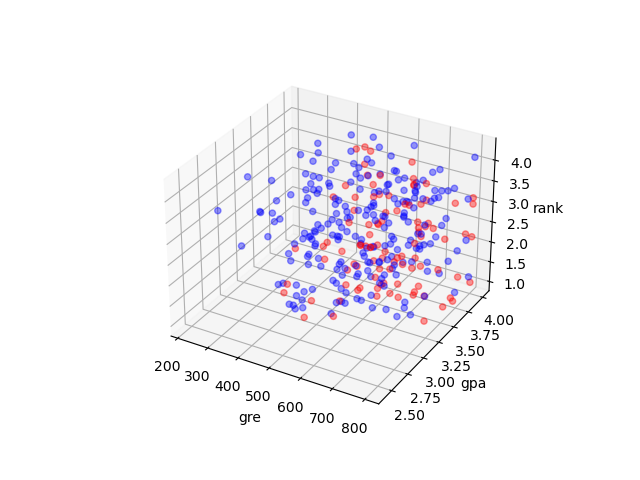

Text(0.5, 0, 'rank')

In [7]:
# Plotting model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = X_train['gre']
ydata = X_train['gpa']
zdata = X_train['rank'] + 0.3*np.random.uniform(size=320)

#ax = plt.axes(projection='3d')
a = ax.scatter3D(xdata, ydata, zdata, c=y_train, cmap='bwr', alpha=0.4)

ax.set_xlabel('gre')
ax.set_ylabel('gpa')
ax.set_zlabel('rank')
#fig.colorbar(a)

In [8]:
# Prediction
X1_test = sm.add_constant(X_test)
y_predict = fitmodel.predict(X1_test)

In [9]:
y_predict.head()

276    0.254703
274    0.241196
164    0.308097
393    0.446465
136    0.134771
dtype: float64

In [10]:
y_predict_int = (y_predict > 0.5).astype(int)
y_predict_int.head()

276    0
274    0
164    0
393    0
136    0
dtype: int32

In [11]:
len(y_test) - (y_predict_int == y_test).sum()

26

### Find the accuracy of the model

In [12]:
print(f'The accuracy:{((y_predict_int == y_test).sum()/len(y_test))*100}')

The accuracy:67.5


The accuracy of the model seems 67.5%.

# PART 2

In [13]:
# load dataset 
gradadmission2 = pd.read_csv('gradadmission.csv')
gradadmission2

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [14]:
X_2 = gradadmission2[['admit','gre','gpa']]
y_2 = gradadmission2['rank']

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.25, random_state=111, stratify=y_2)

In [16]:
X_train2.head()

,admit,gre,gpa
47,0,500,2.97
326,0,680,3.31
302,1,400,3.15
126,1,600,3.54
115,0,620,3.99


In [17]:
y_train2.head()

47     4
326    2
302    2
126    1
115    3
Name: rank, dtype: int64

In [18]:
#Since we are going to use One Vs Rest algorithm, set > multi_class='ovr'
from sklearn.linear_model import LogisticRegression

ovrlogreg = LogisticRegression(multi_class='ovr', random_state=11)

In [19]:
model2 = ovrlogreg.fit(X_2, y_2)

In [20]:
y_pred2 = model2.predict(X_test2)
print(f'Misclassified examples: {(y_test2 != y_pred2).sum()}')

Misclassified examples: 55


### Find the accuracy of the model

In [21]:
print(f'The accuracy: {(accuracy_score(y_test2, y_pred2))*100:.3f}' )

The accuracy: 45.000


The accuracy of the second model seems 45% and which is lower than the previous model.